In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd

# O Pêndulo Simples

## Dados coletados

In [2]:
t = np.array([2.81, 2.87, 2.88, 2.81, 2.88, 2.88, 2.81, 2.88, 2.89, 2.82, 2.88, 2.89, 2.87, 2.82, 2.88, 
              2.81, 2.91, 2.90, 2.88, 2.88, 2.87, 2.89, 2.90, 2.89, 2.89, 2.87, 2.88, 2.87, 2.88, 2.93,
             ]) #s

print(np.mean(t))

2.870666666666667


In [3]:
#1: 15.42, 12.54, 9.67, 6.86
#2: 91.80, 88.92, 86.04, 83.23
#3: 9.12, 6.23, 3.35, 0.54
#4: 23.36, 20.37, 17.49, 14.67
#5: 17.35, 14.47, 11.65, 8.78
#6: 12.09, 9.19, 6.28, 3.47
#7: 18.78, 15.91, 13.03, 10.15
#8: 16.38, 13.49, 10.59, 7.69
#9: 13.17, 10.29, 7.42, 4.53
#10: 12.23,9.30, 6.42, 3.55



## A incerteza do período:

A medida do período do pêndulo foi tomada através de uma gravação de seu movimento, a qual conta com um cronômetro. Ao analisarmos o vídeo vemos que, em média, o menor instante de tempo em que conseguimos perceber a mudança de um quadro pra outro é de $0.07 s$. Tendo isto em vista, adoratemos como incerteza instrumental sendo metade dessa menor medida de percepção com apenas um algarismo significativo, isto é, ${\sigma_T}_{inst} = 0.035s$, o qual se trata de um valor maior do que a incerteza do cronômetro. Adotando apenas um algarismo significativo para a nossa incerteza instrumental temos ${\sigma_T}_{inst} = 0.035s$. Além disto, também temos um erro estatístico que consiste no desvio padrão da média, o qual é definido por:

$${\sigma_{T}}_{est} = \sqrt{\frac{1}{N(N-1)} \sum_{i=1}^N (T_i - \bar{T})^2}$$


onde $\bar{T}$ consiste na média das medidas de período. A incerteza final do período consiste na raiz da soma quadrática da incerteza instrumental e estatísitca:

$$\sigma_\bar{T} = \sqrt{{\sigma_{T}}_{inst}^2 + {\sigma_{\bar{T}}}_{est}^2}$$

In [4]:
sigma_T_est = np.std(t)/np.sqrt(len(t)-1)
sigma_T = np.sqrt(sigma_T_est**2 + 0.04**2)
print("Incerteza estatística: %.3fs" % (sigma_T_est))
print("Incerteza final: %.2fs" % (sigma_T))

Incerteza estatística: 0.006s
Incerteza final: 0.04s


## O valor do módulo da aceleração da gravidade

A expressão para o período do pêndulo é dada por:

$$T = 2\pi \sqrt{\frac{L}{g}}$$

Para obtermos o valor do módulo da aceleração da gravidade utilizanodo o valor médio das medidas de período devemos isolá-lo na equação acima:

$$g_{exp} = \left(\frac{2\pi}{\bar{T}}\right)^2 L $$

A incerteza atrelada a essa grandeza pode ser obtida propagando o erro associado a $L$ e a $\bar{T}$ da seguinte maneira:

$$\sigma_{g_{exp}} = \sqrt{\left(\frac{\partial g_{exp}}{\partial \bar{T}}\right)^2\sigma_{\bar{T}}^2 + \left(\frac{\partial g_{exp}}{\partial L}\right)^2\sigma_{L}^2}$$

$$\sigma_{g_{exp}} = \sqrt{\left(\frac{\partial \left(\frac{2\pi}{\bar{T}}\right)^2 L}{\partial \bar{T}}\right)^2\sigma_{\bar{T}}^2 + \left(\frac{\partial \left(\frac{2\pi}{\bar{T}}\right)^2 L}{\partial L}\right)^2\sigma_{L}^2}$$

$$\sigma_{g_{exp}} = \sqrt{\left(-2\frac{(2\pi)^2}{\bar{T}^3}L\right)^2\sigma_{\bar{T}}^2 + \left(\frac{2\pi}{\bar{T}} \right)^4\sigma_{L}^2}$$

$$\sigma_{g_{exp}} = \left(\frac{2\pi}{\bar{T}}\right)^2 L\sqrt{\left(2\frac{\sigma_{\bar{T}}}{\bar{T}}\right)^2 + \left(\frac{\sigma_L}{L} \right)^2}$$

$$\sigma_{g_{exp}} = g_{exp}\sqrt{\left(2\frac{\sigma_{\bar{T}}}{\bar{T}}\right)^2 + \left(\frac{\sigma_L}{L} \right)^2}$$

In [5]:
g = 9.80665 #m/s^2
l = 2.08 #m
sigma_L = 0.02/100 #m

g_exp = (2*np.pi/np.mean(t))**2 * 2.08 #m/s^2

sigma_g_exp = g_exp*np.sqrt((2*sigma_T/np.mean(t))**2 + (sigma_L/l)**2) #m/s^2

print("g_exp = (%.1f +- %.1f) m/s^2" % (g_exp, sigma_g_exp))

print(10/g -1)

g_exp = (10.0 +- 0.3) m/s^2
0.01971621297792825


# Queda Livre


## Dados obtidos:

In [133]:
h = np.array([175, 165, 160, 140, 195, 180, 185, 160, 195, 180, 185, 155, 185, 165, 170, 160, 180, 160, 185, 170])*1e-3 #m

sigma_h = np.full(len(h), 5e-3) #m 

t_q =np.array([0.379, 0.372, 0.361, 0.347, 0.402, 0.385, 0.387, 0.371, 0.399, 0.382,
               0.385, 0.359, 0.385, 0.368, 0.379, 0.363, 0.385, 0.368, 0.390, 0.372] )/2 #s

In [134]:
print(2*h/t_q**2)

[9.74652084 9.53867499 9.82190131 9.30163028 9.65322641 9.71496036
 9.88188477 9.29955464 9.79893342 9.86815054 9.98482037 9.62127854
 9.98482037 9.74716446 9.46804882 9.71396914 9.71496036 9.45179584
 9.7304405  9.82772575]


## O tempo de queda

O aplicativo Phyphox nos fornece o intervalo de tempo entre dois pulsos sonoros emitidos pela colisão da bolinha com a bancada do laboratório. Deste modo, este intervalo corresponde ao tempo de subida e ao tempo de queda. No entanto, como este movimento é simétrico esses tempos são iguais e consequentemente o tempo de queda corresponde a metade do valor obtido através do aplicativo:

$$t_q = \frac{t}{2}$$

O erro associado ao tempo de queda porvém da propagação do erro associado a medida do aplicativo, o qual é dado por:

$$\sigma_{t_q} = \bigg\vert\frac{d t_q}{dt}\bigg\vert\sigma_{t}$$

$$\sigma_{t_q} = \frac{1}{2}\sigma_{t}$$

A menor medida que o aplicativo pode fazer é $0.001s$, o que implica que a incerteza associada a esta medida será metade deste valor , isto é, $\sigma_t =0.0005 \ s$. Desta forma:

$$\sigma_{t_q} = 0.0002 \ s$$

In [135]:
sigma_t_q = np.full(len(t_q), 0.0002)

## Gráfico dos dados brutos:


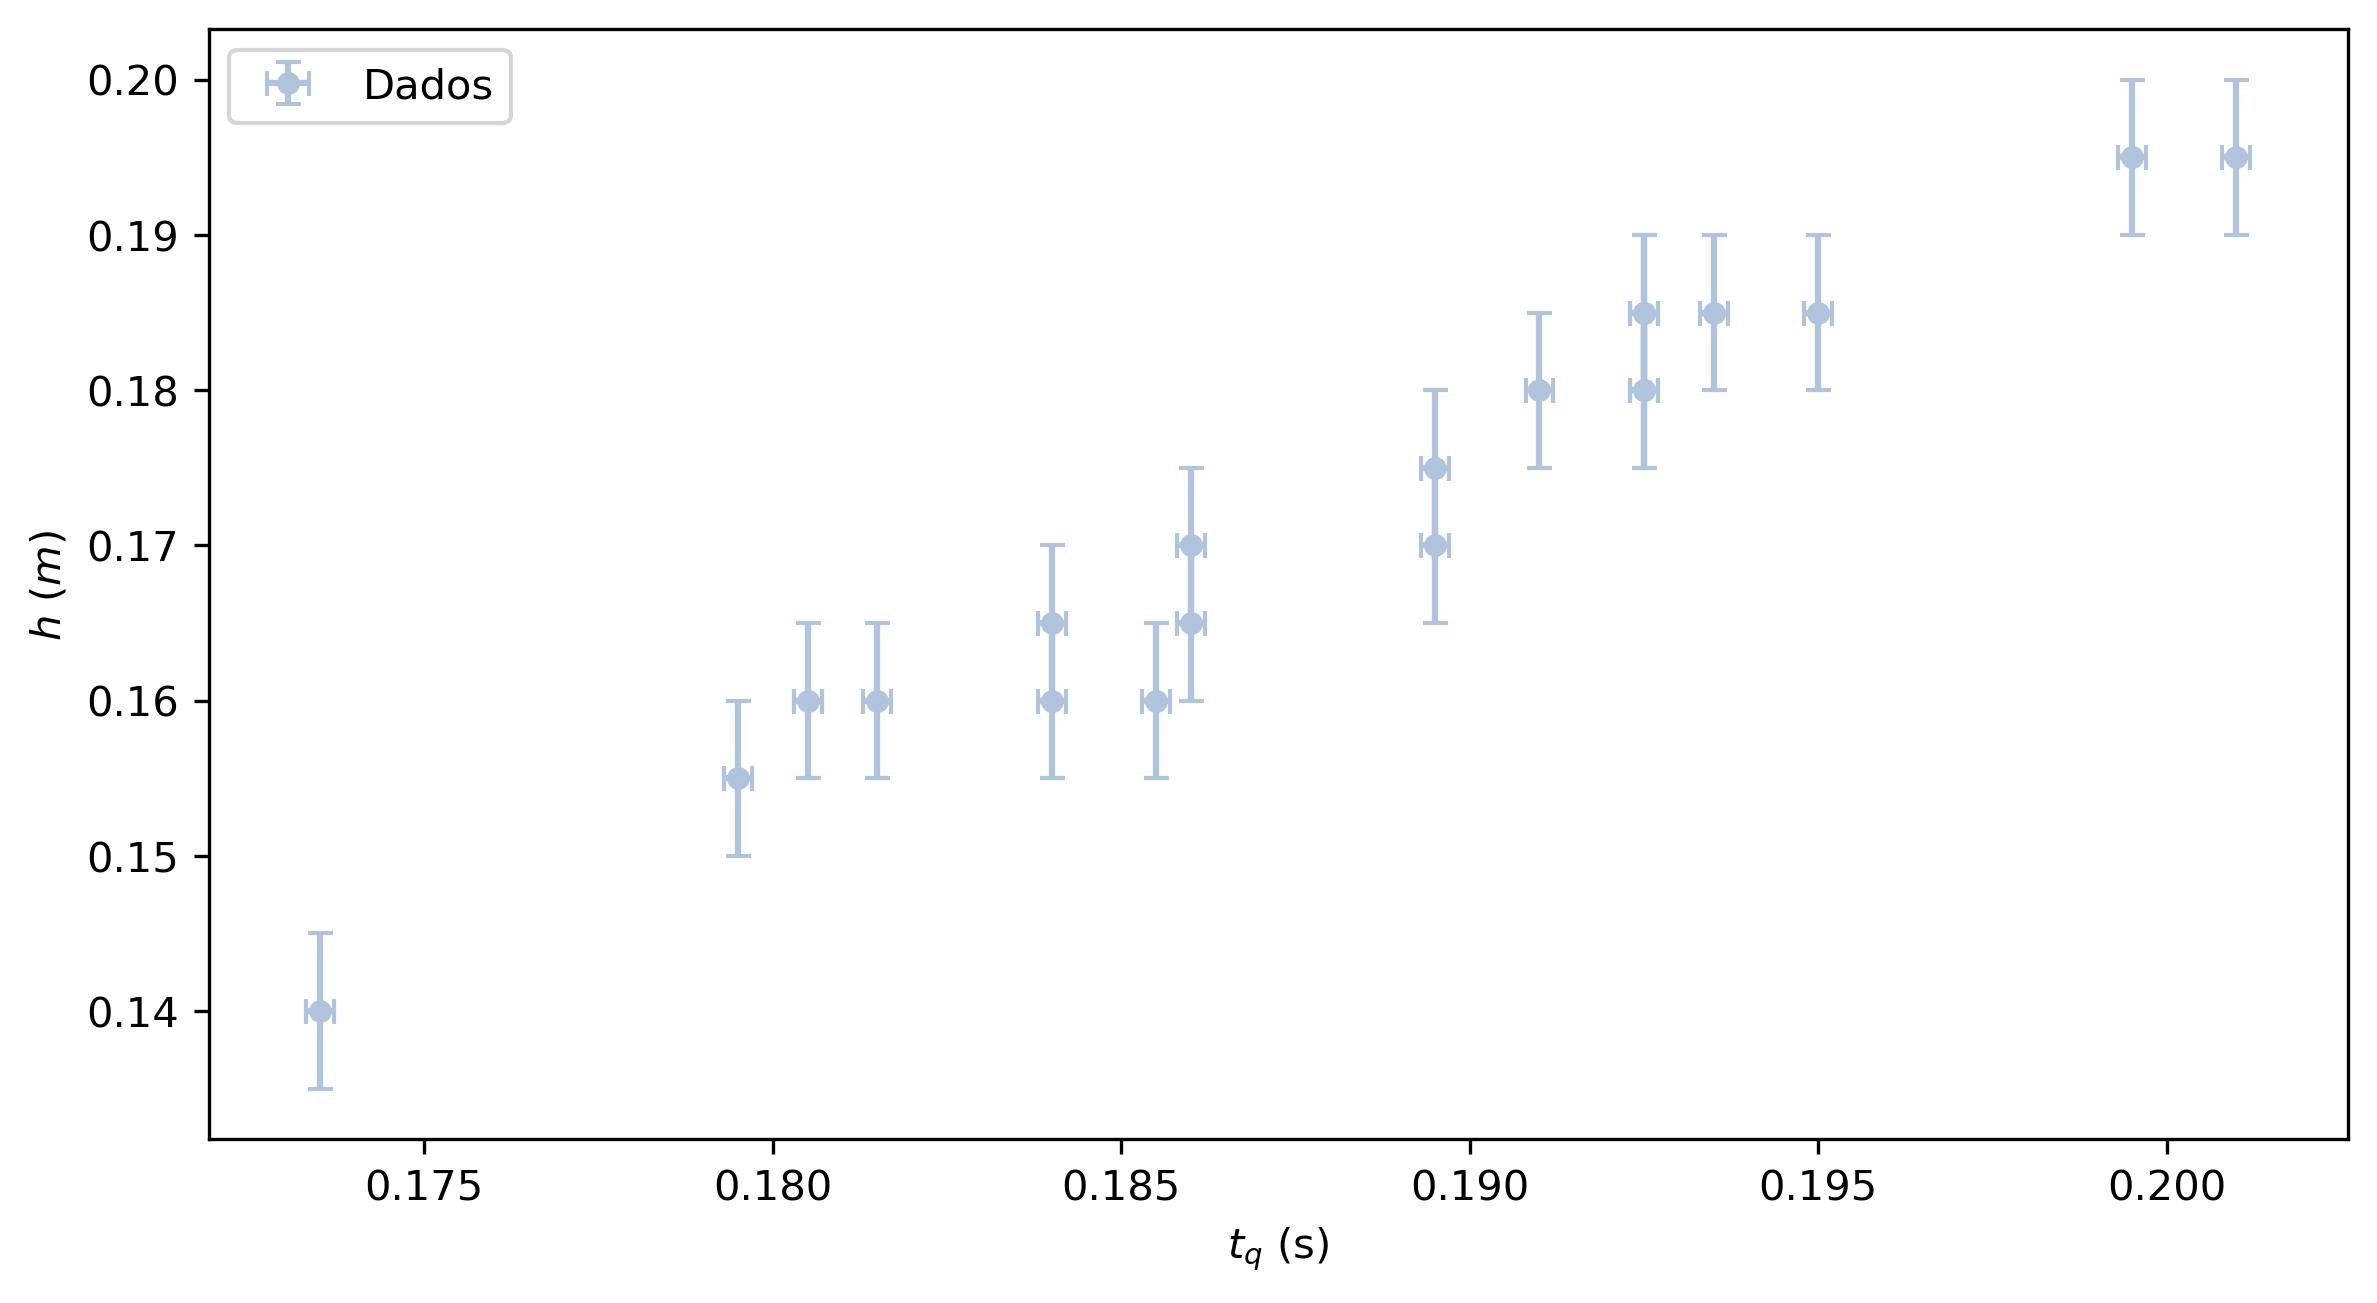

In [136]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_q,h,sigma_h,sigma_t_q, 'o', ms = 4.5, capsize=3, color = 'lightsteelblue', label = 'Dados')
plt.ylabel(r'$h$ ($m$)')
plt.xlabel(r'$t_q$ (s)')
plt.legend()
#plt.savefig('Graphs/ESR/Dadosbrutos_3B.pdf', dpi = 300)
plt.show()

## Linearização dos dados

Para linearizarmos os dados iremos aplicar o logaritmo natural em ambas as grandezas. Além disto, devemos fazer a propagação das oncertezas da seguinte forma:

$$\sigma_{\ln(t_q)} = \bigg\vert\frac{d\ln(t_q)}{d t_q}\bigg\vert\sigma_{t_q}$$

$$\sigma_{\ln(t_q)} = \frac{1}{t_q}\sigma_{t_q}$$

De maneira análoga:

$$\sigma_h = \frac{1}{h}\sigma_h$$

In [137]:
ln_t_q = np.log(t_q)

sigma_ln_t_q = sigma_t_q/t_q
sigma_ln_t_q =  [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_ln_t_q]

ln_h = np.log(h)

sigma_ln_h = sigma_h/h
sigma_ln_h =  [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_ln_h]

## Gráfico dos dados linearizados

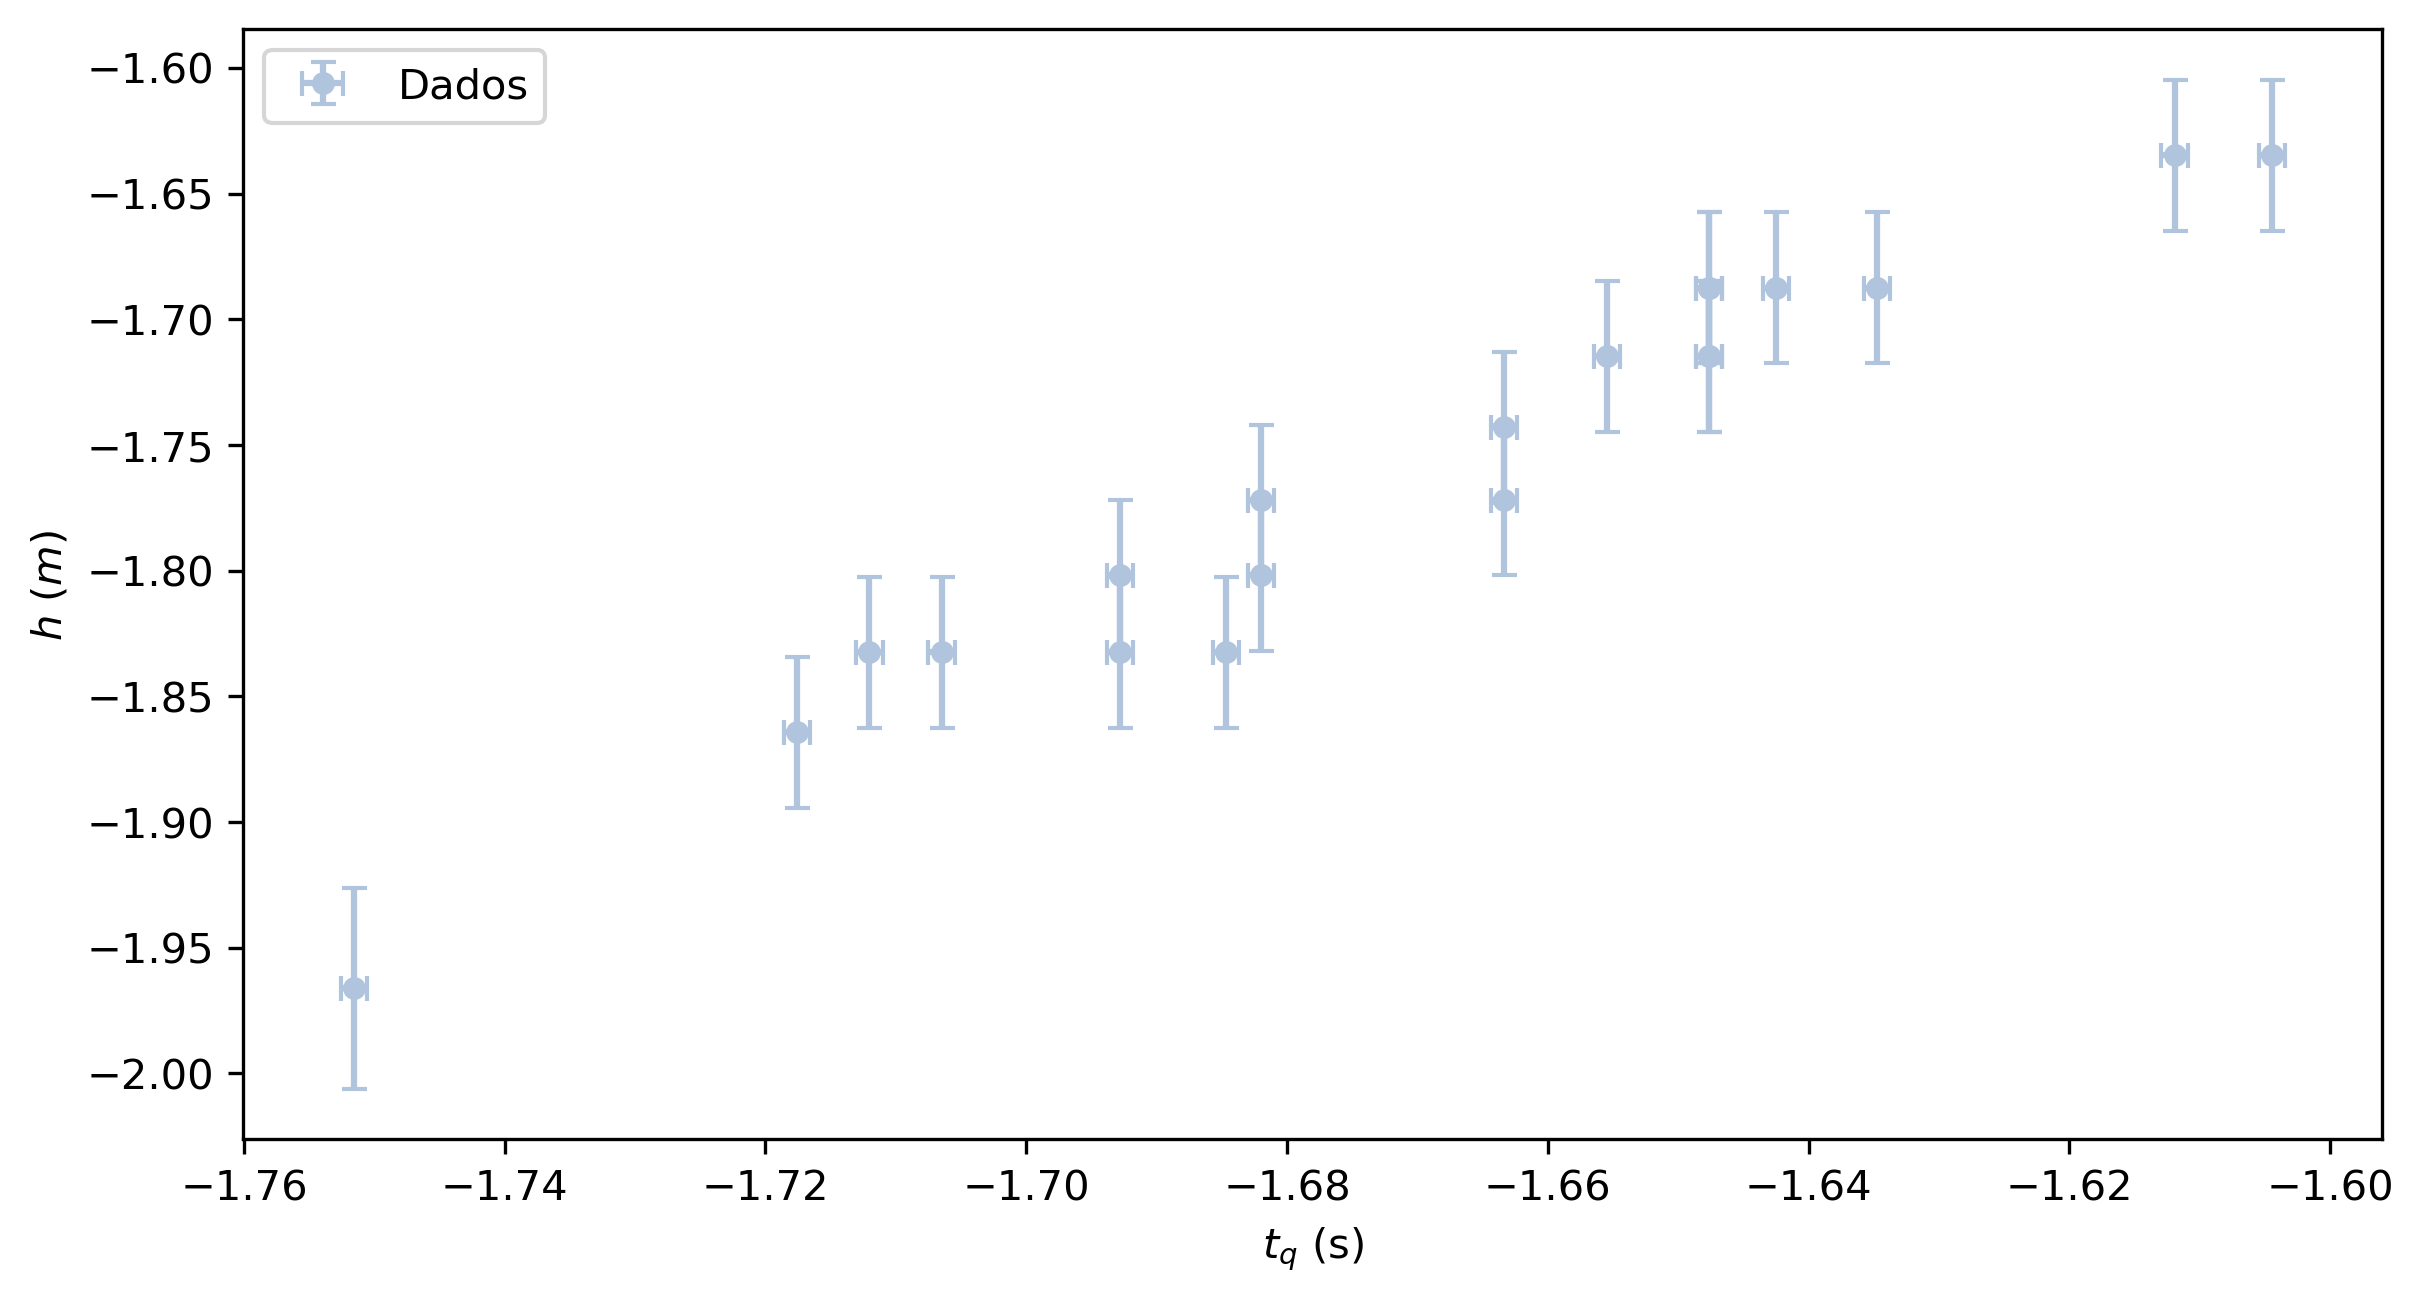

In [138]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(ln_t_q,ln_h,sigma_ln_h,sigma_ln_t_q, 'o', ms = 4.5, capsize=3, color = 'lightsteelblue', label = 'Dados')
plt.ylabel(r'$h$ ($m$)')
plt.xlabel(r'$t_q$ (s)')
plt.legend()
#plt.savefig('Graphs/ESR/Dadosbrutos_3B.pdf', dpi = 300)
plt.show()

## Ajuste linear

In [139]:
fitpars, cov_pars = np.polyfit(ln_t_q,ln_h,1,w=np.power(sigma_ln_h,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.1f +- %.1f ' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.1f +- %.1f' %(coef_linear,sigma_linear))

Coeficiente angular: 2.2 +- 0.1 
Coeficiente linear: 2.0 +- 0.2


## Gráfico contendo o ajuste linear

In [140]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, ln_t_q)
chi_squared = np.sum(((yhat - ln_h)/sigma_ln_h) ** 2)
chi2_red = chi_squared/(len(ln_h)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 0.369


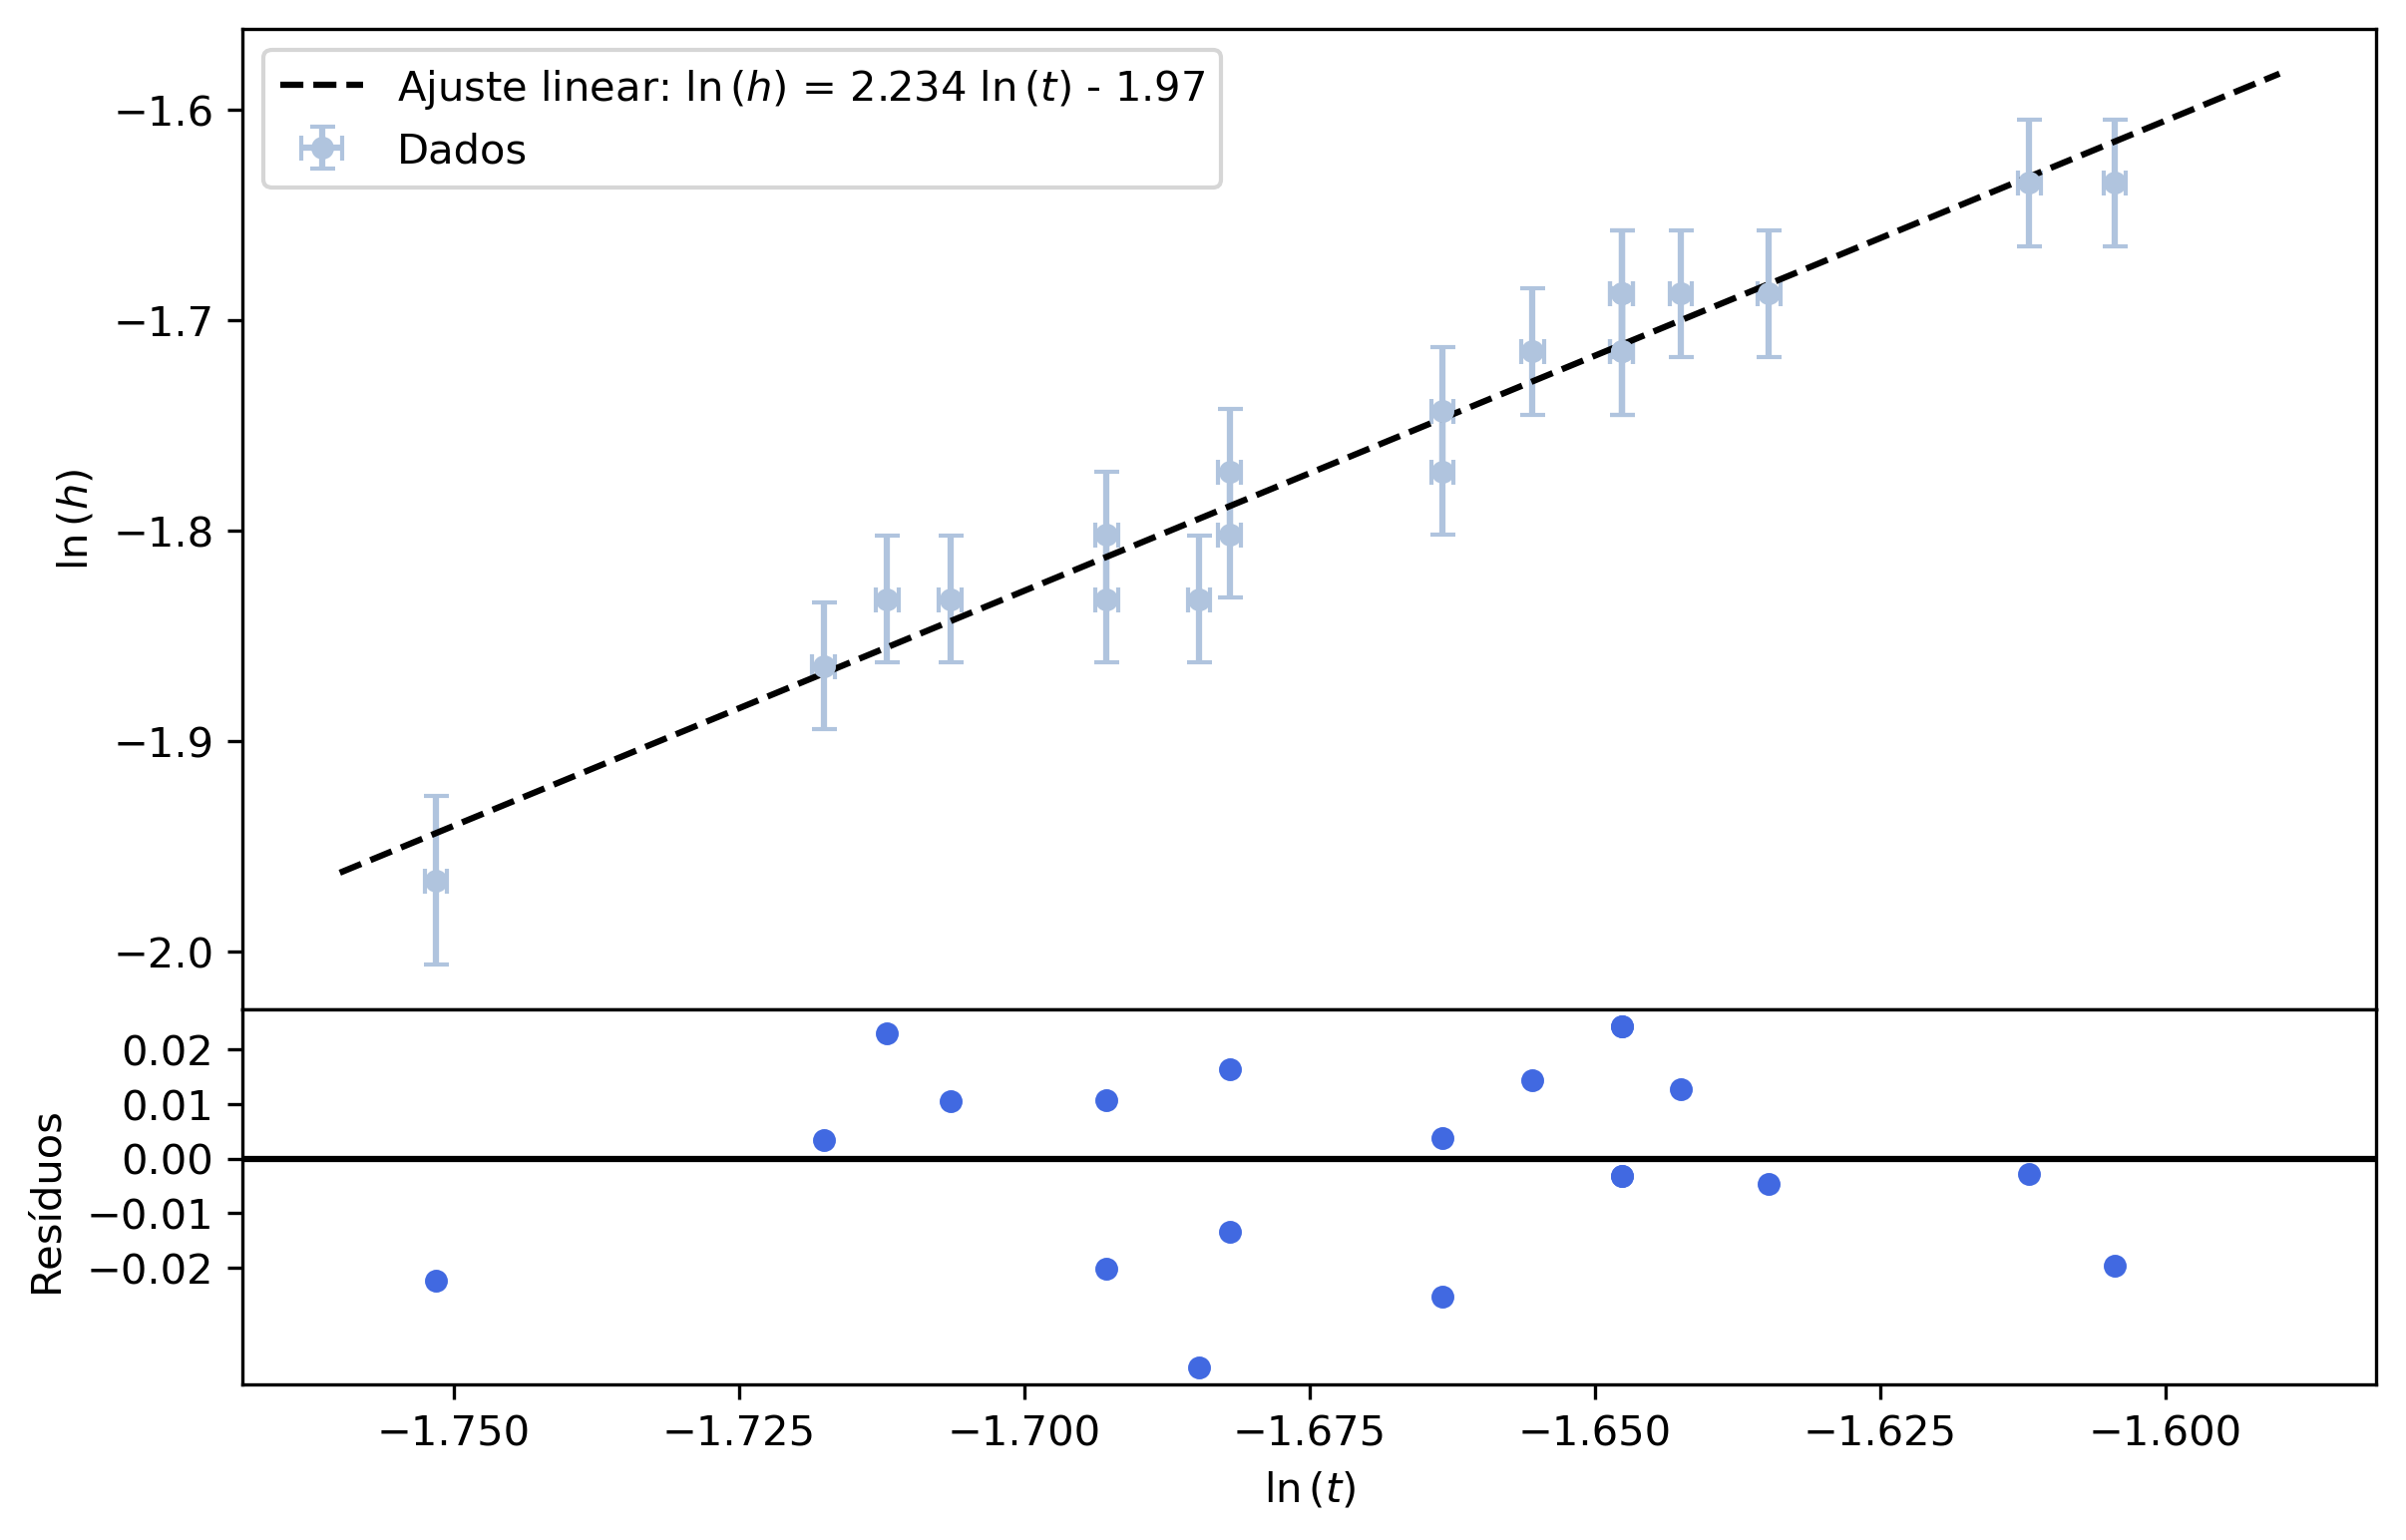

In [141]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)

x = np.arange(-1.76,-1.58,0.01)
#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(ln_t_q,ln_h,sigma_ln_h,sigma_ln_t_q, 'o', ms = 4.5, capsize=3, color = 'lightsteelblue', label = 'Dados')
axs[0].plot(x,(x*coef_angular + coef_linear), color ='black', ls = '--',
            label = r'Ajuste linear: $\ln{(h)}$ = %.3f $\ln{(t)}$ - %.2f' % (coef_angular,abs(coef_linear)))
axs[0].set_ylabel(r'$\ln{(h)}$')
axs[0].legend()
#axs[0].set_title('')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (ln_h - yhat)
axs[1].plot(ln_t_q, resid, 'o',ms = 4.5,  color = 'royalblue', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ")
axs[1].set_yticks(np.arange(-2,2.2,1.0)*1e-2)


plt.xlabel(r'$\ln{(t)}$')
#plt.savefig('Graphs/ESR/AjusteResiduos_3B.pdf', dpi = 300)

plt.show()

In [142]:
print(2*np.exp(2))

14.7781121978613
